In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('../../DSML19/Dataset/titanic/train.csv')
df_test = pd.read_csv('../../DSML19/Dataset/titanic/test.csv')

In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [5]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x16b93d4a190>,
 'caps': [<matplotlib.lines.Line2D at 0x16b93d4a7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16b93d2be80>],
 'medians': [<matplotlib.lines.Line2D at 0x16b93d4acd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16b93d4afa0>],
 'means': []}

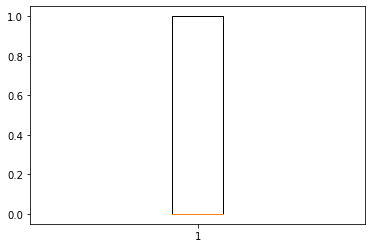

In [6]:
plt.boxplot(df_train['Survived']) # check outlier

In [7]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# select numeric columns

In [8]:
num_cl=list(df_train.select_dtypes(exclude='object').columns)

In [9]:
num_cl.remove('Survived')


In [10]:
num_cl.remove('PassengerId')

In [11]:
num_cl

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [12]:
# select categorical columns
cat_cl=list(df_train.select_dtypes(include='object').columns)

In [13]:
print(cat_cl)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [14]:
cat_cl.remove('Name')
cat_cl.remove('Ticket')
cat_cl.remove('Sex')

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [16]:
from sklearn.impute import SimpleImputer

# imputation

In [17]:
# NUMERIC DATA
# fill missing values
imputer_num = SimpleImputer(strategy='median')
imputer_num.fit(df_train[num_cl])
df_train[num_cl] = imputer_num.transform(df_train[num_cl])

df_test[num_cl] = imputer_num.transform(df_test[num_cl])

# CATEGORICAL DATA
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit(df_train[cat_cl])
df_train[cat_cl] = imputer_cat.transform(df_train[cat_cl])

df_test[cat_cl] = imputer_cat.transform(df_test[cat_cl])


In [18]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# encoding

In [19]:
ohe=OneHotEncoder(handle_unknown='ignore') # convert categorical data to numeric formate
ohe.fit(df_train[cat_cl])
temp = pd.DataFrame(data=ohe.transform(df_train[cat_cl]).toarray(), columns=ohe.get_feature_names())

temp1 = pd.DataFrame(data=ohe.transform(df_test[cat_cl]).toarray(), columns=ohe.get_feature_names())



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
cl_final=num_cl+list(ohe.get_feature_names())

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
df_train = pd.concat([df_train, temp], axis=1)
df_test = pd.concat([df_test, temp1], axis=1)

In [22]:
cl_final

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'x0_A10',
 'x0_A14',
 'x0_A16',
 'x0_A19',
 'x0_A20',
 'x0_A23',
 'x0_A24',
 'x0_A26',
 'x0_A31',
 'x0_A32',
 'x0_A34',
 'x0_A36',
 'x0_A5',
 'x0_A6',
 'x0_A7',
 'x0_B101',
 'x0_B102',
 'x0_B18',
 'x0_B19',
 'x0_B20',
 'x0_B22',
 'x0_B28',
 'x0_B3',
 'x0_B30',
 'x0_B35',
 'x0_B37',
 'x0_B38',
 'x0_B39',
 'x0_B4',
 'x0_B41',
 'x0_B42',
 'x0_B49',
 'x0_B5',
 'x0_B50',
 'x0_B51 B53 B55',
 'x0_B57 B59 B63 B66',
 'x0_B58 B60',
 'x0_B69',
 'x0_B71',
 'x0_B73',
 'x0_B77',
 'x0_B78',
 'x0_B79',
 'x0_B80',
 'x0_B82 B84',
 'x0_B86',
 'x0_B94',
 'x0_B96 B98',
 'x0_C101',
 'x0_C103',
 'x0_C104',
 'x0_C106',
 'x0_C110',
 'x0_C111',
 'x0_C118',
 'x0_C123',
 'x0_C124',
 'x0_C125',
 'x0_C126',
 'x0_C128',
 'x0_C148',
 'x0_C2',
 'x0_C22 C26',
 'x0_C23 C25 C27',
 'x0_C30',
 'x0_C32',
 'x0_C45',
 'x0_C46',
 'x0_C47',
 'x0_C49',
 'x0_C50',
 'x0_C52',
 'x0_C54',
 'x0_C62 C64',
 'x0_C65',
 'x0_C68',
 'x0_C7',
 'x0_C70',
 'x0_C78',
 'x0_C82',
 'x0_C83',
 'x0_C

# Scaling

In [23]:
scaler = MinMaxScaler()
scaler.fit(df_train[num_cl])
df_train[num_cl] = scaler.transform(df_train[num_cl])

df_test[num_cl] = scaler.transform(df_test[num_cl])


# model

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [95]:
model_lr=LogisticRegression()
model_lr.fit(df_train[cl_final],df_train['Survived'])

LogisticRegression()

In [27]:
# Make predictions
yp = model_lr.predict(df_test[cl_final])

In [28]:
df_submission = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived':yp})

In [29]:
df_submission.to_csv('submission_lr.csv', index=False) # convert trained model to csv

In [87]:
model_dt=DecisionTreeClassifier(max_depth=10,min_samples_leaf=1)
model_dt.fit(df_train[cl_final],df_train['Survived'])

DecisionTreeClassifier(max_depth=10)

In [89]:
# Make predictions
yp = model_dt.predict(df_test[cl_final])

In [90]:
df_submission = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived':yp})

In [91]:
df_submission.to_csv('submission_dtt.csv', index=False)

In [115]:
model_rf=RandomForestClassifier(max_depth=10, min_samples_leaf= 1,n_estimators=100)
model_rf.fit(df_train[cl_final],df_train['Survived'])

RandomForestClassifier(max_depth=10)

In [117]:
# Make predictions
yp = model_rf.predict(df_test[cl_final])

In [118]:
df_submission = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived':yp})

In [119]:
df_submission.to_csv('submission_titanic.csv', index=False)

In [40]:
import xgboost

In [41]:
model_xg = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0)
model_xg.fit(df_train[cl_final],df_train['Survived'])

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [43]:
# Make predictions
yp = model_xg.predict(df_test[cl_final])

In [44]:
yp=yp.astype(int)

In [45]:
df_submission = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived':yp})

In [46]:
df_submission.to_csv('submission_xg.csv', index=False)

In [47]:
yp=yp.astype(int)

In [48]:
from sklearn.svm import SVC

In [124]:
model_sv=SVC(kernel='linear')
model_sv.fit(df_train[cl_final],df_train['Survived'])

SVC(kernel='linear')

In [51]:
# Make predictions
yp = model_sv.predict(df_test[cl_final])

In [52]:
df_submission = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived':yp})

In [53]:
df_submission.to_csv('submission_sv.csv', index=False)